## Cov-19_Pred

In [432]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance
%matplotlib inline

### we've been provided with the dataset having 423 diff patients on the scrutiny of 5 days each 

In [433]:
df=pd.read_csv('quirk.csv')
df

,p_id,day,sbp,dbp,hr,rr,o,t,hh,lh,hg,lg
0,1,1,119,54,79,18,94,37.2,80,73,15,15
1,1,2,133,64,73,18,98,37.1,73,69,14,13
2,1,3,140,74,70,20,95,37.5,72,65,13,13
3,1,4,154,78,77,18,95,37.1,80,72,15,14
4,1,5,155,61,64,16,92,36.7,77,64,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...
2110,423,1,119,70,94,22,96,35.9,70,75,14,11
2111,423,2,135,71,101,17,91,37.2,76,65,15,15
2112,423,3,150,73,105,20,94,36.5,81,63,13,13
2113,423,4,91,63,81,18,95,38.0,83,60,11,14


In [434]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2115 entries, 0 to 2114
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   p_id    2115 non-null   int64  
 1   day     2115 non-null   int64  
 2   sbp     2115 non-null   int64  
 3   dbp     2115 non-null   int64  
 4   hr      2115 non-null   int64  
 5   rr      2115 non-null   int64  
 6   o       2115 non-null   int64  
 7   t       2115 non-null   float64
 8   hh      2115 non-null   int64  
 9   lh      2115 non-null   int64  
 10  hg      2115 non-null   int64  
 11  lg      2115 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 198.4 KB


#### p_id ,day,sbp-systolicBP,dbp-,hr-heartrate,rr-resiprate,o-oxygen saturationlvl,t-temperature,

In [435]:
df.describe()

,p_id,day,sbp,dbp,hr,rr,o,t,hh,lh,hg,lg
count,2115.000000,2115.000000,2115.000000,2115.000000,2115.000000,2115.000000,2115.000000,2115.000000,2115.000000,2115.000000,2115.000000,2115.000000
mean,212.000000,3.000000,122.367376,62.516312,88.994326,20.480851,91.876596,34.071508,77.063830,66.977778,11.956974,12.063357
std,122.138118,1.414548,18.800521,10.212598,17.290111,5.158508,4.266256,2.277329,4.315074,4.381303,1.413391,1.422470
min,1.000000,1.000000,89.000000,45.000000,60.000000,12.000000,85.000000,30.000000,70.000000,60.000000,10.000000,10.000000
25%,106.000000,2.000000,106.000000,53.000000,74.000000,16.000000,88.000000,32.090000,73.000000,63.000000,11.000000,11.000000
50%,212.000000,3.000000,123.000000,63.000000,89.000000,20.000000,92.000000,34.160000,77.000000,67.000000,12.000000,12.000000
75%,318.000000,4.000000,139.000000,71.000000,104.000000,25.000000,96.000000,36.030000,81.000000,71.000000,13.000000,13.000000
max,423.000000,5.000000,155.000000,79.000000,119.000000,29.000000,99.000000,40.000000,87.000000,76.000000,16.000000,15.000000


In [436]:
df.columns

Index(['p_id', 'day', 'sbp', 'dbp', 'hr', 'rr', 'o', 't', 'hh', 'lh', 'hg',
       'lg'],
      dtype='object')

In [437]:
df['o'].unique()

array([94, 98, 95, 92, 89, 99, 91, 86, 88, 93, 97, 87, 96, 85, 90],
      dtype=int64)

In [438]:
df['o'].describe()

count    2115.000000
mean       91.876596
std         4.266256
min        85.000000
25%        88.000000
50%        92.000000
75%        96.000000
max        99.000000
Name: o, dtype: float64

In [439]:
df['t'].value_counts()

30.15    9
34.97    8
36.91    8
34.21    8
36.58    8
        ..
33.05    1
31.97    1
31.55    1
30.75    1
40.00    1
Name: t, Length: 745, dtype: int64

In [440]:
df.isnull().sum()

p_id    0
day     0
sbp     0
dbp     0
hr      0
rr      0
o       0
t       0
hh      0
lh      0
hg      0
lg      0
dtype: int64

In [441]:
df.head()

,p_id,day,sbp,dbp,hr,rr,o,t,hh,lh,hg,lg
0,1,1,119,54,79,18,94,37.2,80,73,15,15
1,1,2,133,64,73,18,98,37.1,73,69,14,13
2,1,3,140,74,70,20,95,37.5,72,65,13,13
3,1,4,154,78,77,18,95,37.1,80,72,15,14
4,1,5,155,61,64,16,92,36.7,77,64,10,10


In [442]:
# c=1
# v=[]
# for i in range(1,423):
#     a=[]
#     print("inside for")
#     while(df.p_id[c]==i):
#         print(df.p_id[c])
#         print("inside")
#         if(df.dbp[c]!=" " and df.dbp[c-1]!=" "):
#             a.append(int(df.dbp[c])-int(df.dbp[c-1]))
#             print(a)
#         c=c+1
#     if(len(a)==0):
#         print("V cmon")
#         v.append(0)
        
#     elif (np.average(a)>0):
#         print("V it is",v)
#         v.append(1)
#     else:
#         print("V is")
#         v.append(0)
        
# v.append(0)

# df1['dbp']=v


# dat={'p_id':[i for i in range(1,424)],
#       'sbp':[i for i in v]}
# df1=pd.DataFrame(dat)          
# df1

def calculate_dbp(df):        ## above code using fn
    c = 1
    v = []
    for i in range(1, 423):
        a = []
        k = 0
        while df.p_id[c] == i:            ##index of p_id gets increased upon increase if c=c+1
            if df.dbp[c] != " " and df.dbp[c - 1] != " ":
                a.append(int(df.dbp[c]) - int(df.dbp[c - 1]))
                print(a)
            c = c + 1         
        if len(a) == 0:
            v.append(0)
            print(v)
        elif np.average(a) > 0:
            v.append(1)
            print(v)
        else:
            v.append(0)
            print(v)
            
    v.append(0)
    df['dbp'] = v
    return df

##,mAssuming you have a DataFrame 'df1'
df1 = calculate_dbp(df)


In [443]:
import pandas as pd
import numpy as np

def calculate_differences(df):
    c = 1
    v_dbp = []
    v_sbp = []
    v_hr = []
    v_rr = []
    v_o = []
    v_t = []
    v_hh = []
    v_lh = []
    v_hg = []
    v_lg = []

    for i in range(1, 424):
        a_dbp = []
        a_sbp = []
        a_hr = []
        a_rr = []
        a_o = []
        a_t = []
        a_hh = []
        a_lh = []
        a_hg = []
        a_lg = []

        while c < len(df) and df.p_id[c] == i:
            if df.dbp[c] != " " and df.dbp[c-1] != " ":
                a_dbp.append(int(df.dbp[c]) - int(df.dbp[c-1]))

            if df.sbp[c] != " " and df.sbp[c-1] != " ":
                a_sbp.append(int(df.sbp[c]) - int(df.sbp[c-1]))

            if df.hr[c] != " " and df.hr[c-1] != " ":
                a_hr.append(int(df.hr[c]) - int(df.hr[c-1]))

            if df.rr[c] != " " and df.rr[c-1] != " ":
                a_rr.append(int(df.rr[c]) - int(df.rr[c-1]))

            if df.o[c] != " " and df.o[c-1] != " ":
                a_o.append(int(df.o[c]) - int(df.o[c-1]))

            if df.t[c] != " " and df.t[c-1] != " ":
                a_t.append(int(df.t[c]) - int(df.t[c-1]))

            if df.hh[c] != " " and df.hh[c-1] != " ":
                a_hh.append(int(df.hh[c]) - int(df.hh[c-1]))

            if df.lh[c] != " " and df.lh[c-1] != " ":
                a_lh.append(int(df.lh[c]) - int(df.lh[c-1]))

            if df.hg[c] != " " and df.hg[c-1] != " ":
                a_hg.append(int(df.hg[c]) - int(df.hg[c-1]))

            if df.lg[c] != " " and df.lg[c-1] != " ":
                a_lg.append(int(df.lg[c]) - int(df.lg[c-1]))

            c += 1

        v_dbp.append(0 if len(a_dbp) == 0 else (1 if np.average(a_dbp) > 0 else 0))
        v_sbp.append(0 if len(a_sbp) == 0 else (1 if np.average(a_sbp) > 0 else 0))
        v_hr.append(0 if len(a_hr) == 0 else (1 if np.average(a_hr) > 0 else 0))
        v_rr.append(0 if len(a_rr) == 0 else (1 if np.average(a_rr) > 0 else 0))
        v_o.append(0 if len(a_o) == 0 else (1 if np.average(a_o) > 0 else 0))
        v_t.append(0 if len(a_t) == 0 else (1 if np.average(a_t) > 0 else 0))
        v_hh.append(0 if len(a_hh) == 0 else (1 if np.average(a_hh) > 0 else 0))
        v_lh.append(0 if len(a_lh) == 0 else (1 if np.average(a_lh) > 0 else 0))
        v_hg.append(0 if len(a_hg) == 0 else (1 if np.average(a_hg) > 0 else 0))
        v_lg.append(0 if len(a_lg) == 0 else (1 if np.average(a_lg) > 0 else 0))

    data = {
        'p_id': [i for i in range(1, 424)],
        'sbp': v_sbp,
        'dbp': v_dbp,
        'hr': v_hr,
        'rr': v_rr,
        'o': v_o,
        't': v_t,
        'hh': v_hh,
        'lh': v_lh,
        'hg': v_hg,
        'lg': v_lg
    }
    
    df_output = pd.DataFrame(data)
    
    return df_output


In [444]:
df1 = df.copy()

In [445]:
df1 = calculate_differences(df1)

In [446]:
df1

,p_id,sbp,dbp,hr,rr,o,t,hh,lh,hg,lg
0,1,1,1,0,0,0,0,0,0,0,0
1,2,0,0,1,1,1,0,0,0,0,1
2,3,1,1,0,1,0,0,1,1,0,0
3,4,1,1,1,1,0,1,1,1,1,1
4,5,0,0,0,0,1,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
418,419,0,1,1,0,0,1,0,0,1,0
419,420,0,0,0,0,1,1,0,1,1,1
420,421,1,1,1,1,1,1,0,1,0,0
421,422,0,0,0,0,0,0,1,0,0,0


In [447]:
df1.rename(columns = {'p_id':'id'},inplace = True)

In [448]:
df1.head()

,id,sbp,dbp,hr,rr,o,t,hh,lh,hg,lg
0,1,1,1,0,0,0,0,0,0,0,0
1,2,0,0,1,1,1,0,0,0,0,1
2,3,1,1,0,1,0,0,1,1,0,0
3,4,1,1,1,1,0,1,1,1,1,1
4,5,0,0,0,0,1,1,0,1,1,0


In [449]:
df2=pd.read_csv(r'quirk2.csv')
df2                      ##mcv,mch,mchc related to rbc counts

,id,age,sex,ad,motor,verbal,eye,intubated,hemoglobin,hc,mcv,mch,mchc,rdw,pc,serum_creatinine,sodium,potassium,exp
0,1,49,Female,WARD,6.0,5.0,4.0,No,112,NaN,77.0,30.0,340.0,14.9,230.0,NaN,180.0,NaN,No
1,2,78,Male,WARD,6.0,5.0,4.0,No,135,0.441,77.3,23.7,306.0,15.8,290.0,237.0,131.0,3.3,No
2,3,92,Female,WARD,6.0,5.0,4.0,No,126,0.365,93.0,32.0,344.0,1.2,145.0,53.0,131.0,3.8,No
3,4,96,Male,WARD,6.0,5.0,4.0,No,112,NaN,84.0,24.0,352.0,11.0,170.0,NaN,NaN,NaN,No
4,5,63,Female,WARD,6.0,5.0,4.0,No,136,0.399,83.0,28.3,341.0,13.6,151.0,69.0,137.0,4.2,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,398,32,Female,WARD,NaN,NaN,NaN,No,122,0.369,91.5,30.3,331.0,13.4,175.0,186.0,140.0,3.8,No
398,399,65,Male,WARD,NaN,NaN,NaN,Yes,116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,127.0,4.7,No
399,400,60,Male,ICU,NaN,NaN,NaN,No,142,0.424,87.5,29.3,335.0,13.0,377.0,71.0,137.0,4.0,No
400,401,63,Male,ICU,5.0,1.0,2.0,No,146,0.432,98.3,33.3,339.0,13.8,232.0,NaN,139.0,5.2,No


In [450]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402 entries, 0 to 401
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                402 non-null    int64  
 1   age               402 non-null    int64  
 2   sex               402 non-null    object 
 3   ad                402 non-null    object 
 4   motor             312 non-null    float64
 5   verbal            288 non-null    float64
 6   eye               260 non-null    float64
 7   intubated         402 non-null    object 
 8   hemoglobin        402 non-null    int64  
 9   hc                350 non-null    float64
 10  mcv               356 non-null    float64
 11  mch               350 non-null    float64
 12  mchc              350 non-null    float64
 13  rdw               348 non-null    float64
 14  pc                340 non-null    float64
 15  serum_creatinine  326 non-null    float64
 16  sodium            358 non-null    float64
 1

## TO check int only attri

In [451]:
numerics=['int64','float64']
temp = df2.select_dtypes(include=numerics)
for data in temp.columns:
    temp[data]=np.nan_to_num(temp[data])
print(temp)

names=df2.columns.values.tolist()
for row in temp:
    if row in names:
        df2[row]=temp[row]
        


      id  age  motor  verbal  eye  hemoglobin     hc   mcv   mch   mchc   rdw  \
0      1   49    6.0     5.0  4.0         112  0.000  77.0  30.0  340.0  14.9   
1      2   78    6.0     5.0  4.0         135  0.441  77.3  23.7  306.0  15.8   
2      3   92    6.0     5.0  4.0         126  0.365  93.0  32.0  344.0   1.2   
3      4   96    6.0     5.0  4.0         112  0.000  84.0  24.0  352.0  11.0   
4      5   63    6.0     5.0  4.0         136  0.399  83.0  28.3  341.0  13.6   
..   ...  ...    ...     ...  ...         ...    ...   ...   ...    ...   ...   
397  398   32    0.0     0.0  0.0         122  0.369  91.5  30.3  331.0  13.4   
398  399   65    0.0     0.0  0.0         116  0.000   0.0   0.0    0.0   0.0   
399  400   60    0.0     0.0  0.0         142  0.424  87.5  29.3  335.0  13.0   
400  401   63    5.0     1.0  2.0         146  0.432  98.3  33.3  339.0  13.8   
401  402   81    0.0     0.0  0.0         137  0.414  64.3  21.2  330.0  15.1   

        pc  serum_creatinin

In [452]:
df3 = pd.merge(df1,df2,how='inner',on='id')
df3

,id,sbp,dbp,hr,rr,o,t,hh,lh,hg,...,hc,mcv,mch,mchc,rdw,pc,serum_creatinine,sodium,potassium,exp
0,1,1,1,0,0,0,0,0,0,0,...,0.000,77.0,30.0,340.0,14.9,230.0,0.0,180.0,0.0,No
1,2,0,0,1,1,1,0,0,0,0,...,0.441,77.3,23.7,306.0,15.8,290.0,237.0,131.0,3.3,No
2,3,1,1,0,1,0,0,1,1,0,...,0.365,93.0,32.0,344.0,1.2,145.0,53.0,131.0,3.8,No
3,4,1,1,1,1,0,1,1,1,1,...,0.000,84.0,24.0,352.0,11.0,170.0,0.0,0.0,0.0,No
4,5,0,0,0,0,1,1,0,1,1,...,0.399,83.0,28.3,341.0,13.6,151.0,69.0,137.0,4.2,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,398,0,1,0,0,1,1,1,0,0,...,0.369,91.5,30.3,331.0,13.4,175.0,186.0,140.0,3.8,No
398,399,1,1,0,1,0,0,0,1,1,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,127.0,4.7,No
399,400,1,0,1,0,1,1,0,0,1,...,0.424,87.5,29.3,335.0,13.0,377.0,71.0,137.0,4.0,No
400,401,1,1,1,1,0,1,0,1,0,...,0.432,98.3,33.3,339.0,13.8,232.0,0.0,139.0,5.2,No


In [453]:
df3['sex'].replace('Female',0,inplace=True)
df3['sex'].replace('Male',1,inplace=True)
df3['ad'].replace('WARD',0,inplace=True)
df3['ad'].replace('ICU',1,inplace=True)
df3['intubated'].replace('No',0,inplace=True)
df3['intubated'].replace('Yes',1,inplace=True)
df3['exp'].replace('No',0,inplace=True)
df3['exp'].replace('Yes',1,inplace=True)

In [454]:
df3

,id,sbp,dbp,hr,rr,o,t,hh,lh,hg,...,hc,mcv,mch,mchc,rdw,pc,serum_creatinine,sodium,potassium,exp
0,1,1,1,0,0,0,0,0,0,0,...,0.000,77.0,30.0,340.0,14.9,230.0,0.0,180.0,0.0,0
1,2,0,0,1,1,1,0,0,0,0,...,0.441,77.3,23.7,306.0,15.8,290.0,237.0,131.0,3.3,0
2,3,1,1,0,1,0,0,1,1,0,...,0.365,93.0,32.0,344.0,1.2,145.0,53.0,131.0,3.8,0
3,4,1,1,1,1,0,1,1,1,1,...,0.000,84.0,24.0,352.0,11.0,170.0,0.0,0.0,0.0,0
4,5,0,0,0,0,1,1,0,1,1,...,0.399,83.0,28.3,341.0,13.6,151.0,69.0,137.0,4.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,398,0,1,0,0,1,1,1,0,0,...,0.369,91.5,30.3,331.0,13.4,175.0,186.0,140.0,3.8,0
398,399,1,1,0,1,0,0,0,1,1,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,127.0,4.7,0
399,400,1,0,1,0,1,1,0,0,1,...,0.424,87.5,29.3,335.0,13.0,377.0,71.0,137.0,4.0,0
400,401,1,1,1,1,0,1,0,1,0,...,0.432,98.3,33.3,339.0,13.8,232.0,0.0,139.0,5.2,0


In [455]:
df3.dtypes

id                    int64
sbp                   int64
dbp                   int64
hr                    int64
rr                    int64
o                     int64
t                     int64
hh                    int64
lh                    int64
hg                    int64
lg                    int64
age                   int64
sex                   int64
ad                    int64
motor               float64
verbal              float64
eye                 float64
intubated             int64
hemoglobin            int64
hc                  float64
mcv                 float64
mch                 float64
mchc                float64
rdw                 float64
pc                  float64
serum_creatinine    float64
sodium              float64
potassium           float64
exp                   int64
dtype: object

Text(0, 0.5, 'Count')

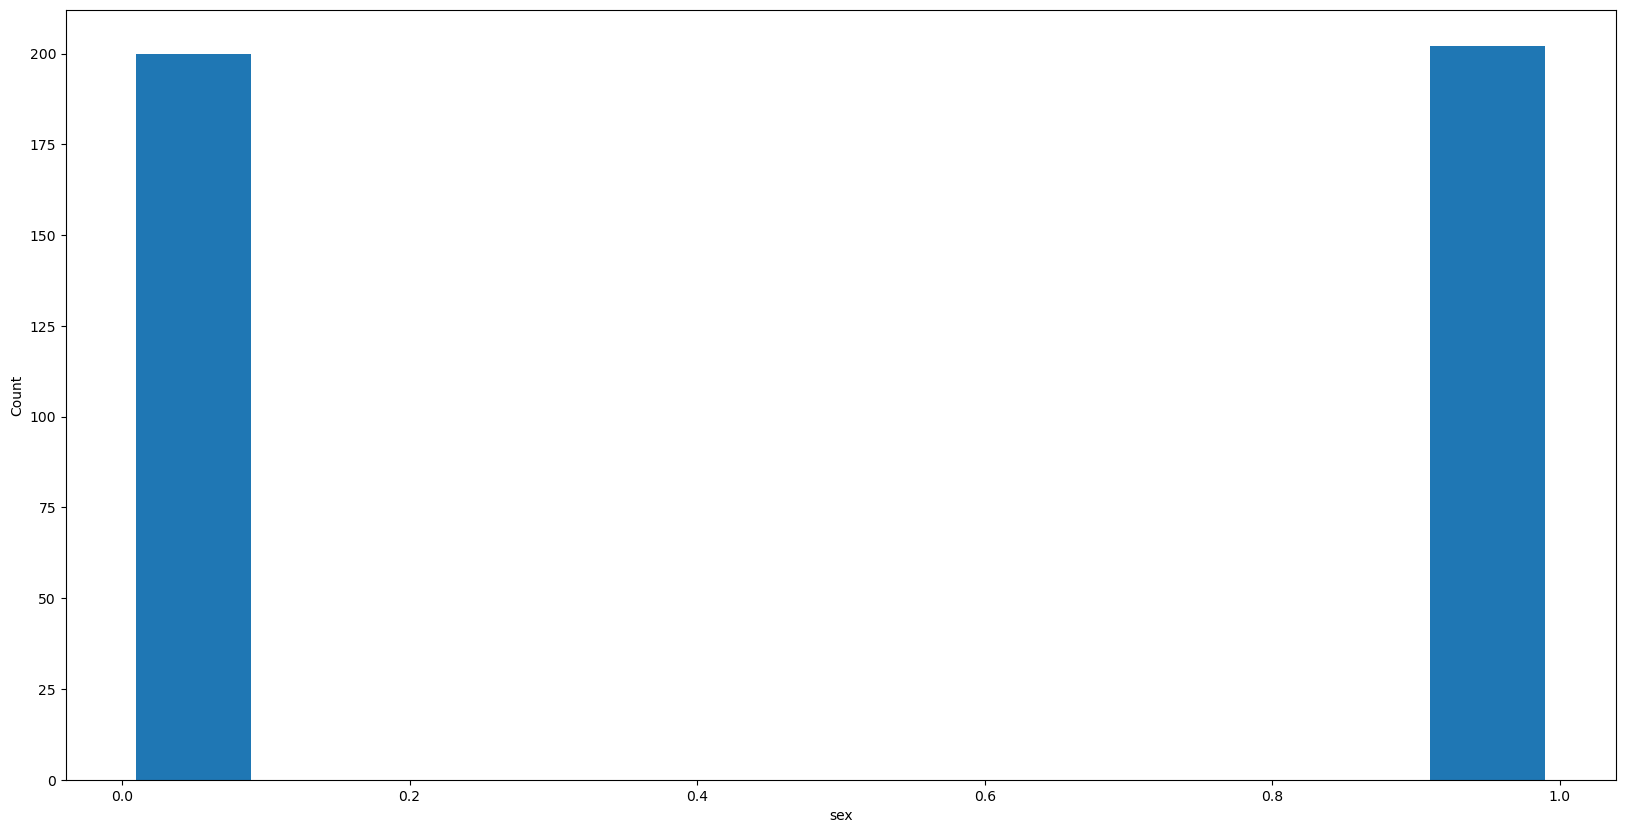

In [456]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df3.sex,rwidth=0.8)
plt.xlabel("sex")
plt.ylabel("Count")

In [483]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

In [458]:
df4= df3.copy()
df3.head(5)

,id,sbp,dbp,hr,rr,o,t,hh,lh,hg,...,hc,mcv,mch,mchc,rdw,pc,serum_creatinine,sodium,potassium,exp
0,1,1,1,0,0,0,0,0,0,0,...,0.000,77.0,30.0,340.0,14.9,230.0,0.0,180.0,0.0,0
1,2,0,0,1,1,1,0,0,0,0,...,0.441,77.3,23.7,306.0,15.8,290.0,237.0,131.0,3.3,0
2,3,1,1,0,1,0,0,1,1,0,...,0.365,93.0,32.0,344.0,1.2,145.0,53.0,131.0,3.8,0
3,4,1,1,1,1,0,1,1,1,1,...,0.000,84.0,24.0,352.0,11.0,170.0,0.0,0.0,0.0,0
4,5,0,0,0,0,1,1,0,1,1,...,0.399,83.0,28.3,341.0,13.6,151.0,69.0,137.0,4.2,1


In [459]:
X = df4.drop(['exp'],axis='columns')

In [460]:
X

,id,sbp,dbp,hr,rr,o,t,hh,lh,hg,...,hemoglobin,hc,mcv,mch,mchc,rdw,pc,serum_creatinine,sodium,potassium
0,1,1,1,0,0,0,0,0,0,0,...,112,0.000,77.0,30.0,340.0,14.9,230.0,0.0,180.0,0.0
1,2,0,0,1,1,1,0,0,0,0,...,135,0.441,77.3,23.7,306.0,15.8,290.0,237.0,131.0,3.3
2,3,1,1,0,1,0,0,1,1,0,...,126,0.365,93.0,32.0,344.0,1.2,145.0,53.0,131.0,3.8
3,4,1,1,1,1,0,1,1,1,1,...,112,0.000,84.0,24.0,352.0,11.0,170.0,0.0,0.0,0.0
4,5,0,0,0,0,1,1,0,1,1,...,136,0.399,83.0,28.3,341.0,13.6,151.0,69.0,137.0,4.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,398,0,1,0,0,1,1,1,0,0,...,122,0.369,91.5,30.3,331.0,13.4,175.0,186.0,140.0,3.8
398,399,1,1,0,1,0,0,0,1,1,...,116,0.000,0.0,0.0,0.0,0.0,0.0,0.0,127.0,4.7
399,400,1,0,1,0,1,1,0,0,1,...,142,0.424,87.5,29.3,335.0,13.0,377.0,71.0,137.0,4.0
400,401,1,1,1,1,0,1,0,1,0,...,146,0.432,98.3,33.3,339.0,13.8,232.0,0.0,139.0,5.2


In [461]:
y = df4.exp

In [462]:
y

0      0
1      0
2      0
3      0
4      1
      ..
397    0
398    0
399    0
400    0
401    1
Name: exp, Length: 402, dtype: int64

In [463]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

## Standardization

In [471]:
## Standardize the dataset
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)

In [472]:
X_train

array([[-0.8643324 , -1.03723771,  0.95134814, ..., -0.19546973,
         0.40856269,  0.07396751],
       [ 0.07987479,  0.96409915,  0.95134814, ...,  0.16343795,
         0.31258035,  0.20531984],
       [ 1.3650457 , -1.03723771, -1.05113991, ...,  0.35104879,
         0.16860685,  0.66505301],
       ...,
       [-0.76816315,  0.96409915, -1.05113991, ..., -0.82355818,
         0.48054944,  0.20531984],
       [-1.38014929, -1.03723771,  0.95134814, ..., -0.17915575,
         0.28858477, -0.38576566],
       [-0.28731689, -1.03723771,  0.95134814, ..., -0.03232988,
         0.31258035,  0.46802451]])

In [473]:
X_test=scaler.transform(X_test)
X_test

array([[-0.05126509, -1.03723771, -1.05113991, ..., -0.82355818,
         0.33657594,  1.12478618],
       [ 1.67978143, -1.03723771,  0.95134814, ...,  0.69364249,
         0.36057152,  0.20531984],
       [-1.27523738, -1.03723771, -1.05113991, ..., -0.82355818,
         0.31258035,  0.13964368],
       ...,
       [-1.721113  , -1.03723771,  0.95134814, ..., -0.82355818,
         0.21659802,  0.33667218],
       [ 1.68852409,  0.96409915,  0.95134814, ..., -0.82355818,
         0.04862893,  0.79640535],
       [ 1.38253101, -1.03723771,  0.95134814, ...,  0.35104879,
         0.36057152,  0.86208152]])

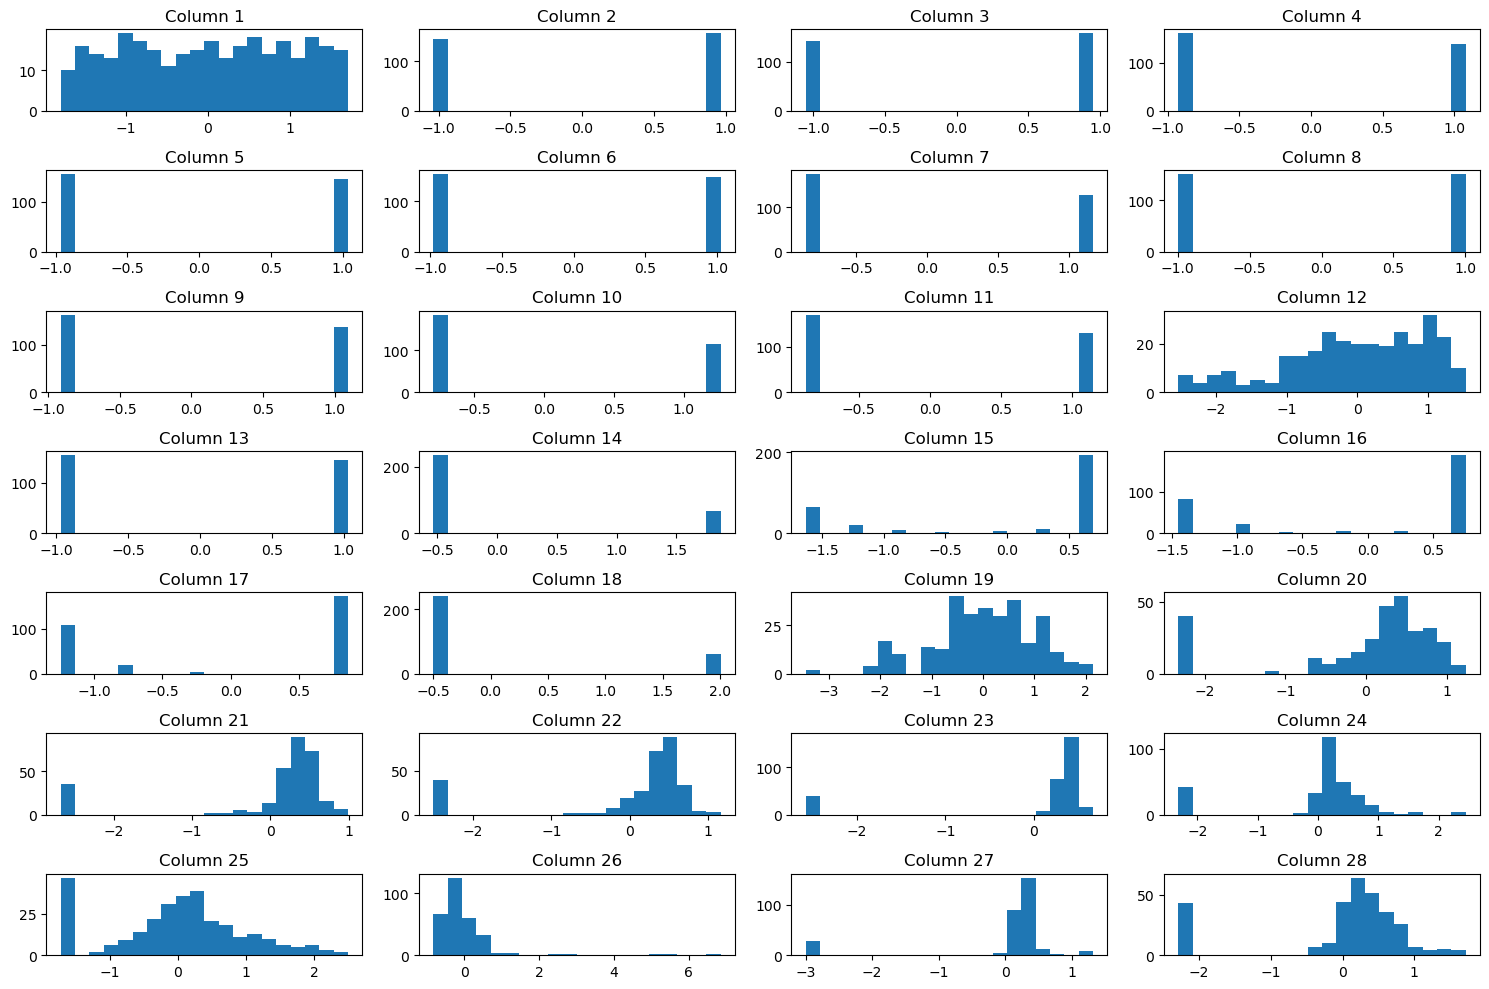

In [474]:
##check if the data follows gaussian dist
##352x13 info rxc
# Plot the histogram of the data for each column
fig, axs = plt.subplots(7, 4, figsize=(15, 10))
axs = axs.flatten()

for i in range(X_train.shape[1]):
    axs[i].hist(X_train[:, i], bins=20)
    axs[i].set_title("Column {}".format(i+1))

plt.tight_layout()
plt.show()

In [468]:
len(X_test)

101

In [484]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto', probability=True),
        'params': {
            'svc__C': [1, 10, 100, 1000],
            'svc__kernel': ['rbf', 'linear']
        }
    },
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'decisiontreeclassifier__max_depth': [None, 5, 10],
            'decisiontreeclassifier__criterion': ['gini', 'entropy']
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params': {
            'randomforestclassifier__n_estimators': [1, 5, 10]
        }
    },
    'logistic_regression': {
        'model': LogisticRegression(solver='liblinear', multi_class='auto'),
        'params': {
            'logisticregression__C': [1, 5, 10]
        }
    },
    'naive_bayes': {
        'model': GaussianNB(),
        'params': {}
    },
    'knn': {
        'model': KNeighborsClassifier(),
        'params': {
            'kneighborsclassifier__n_neighbors': [3, 5, 7],
            'kneighborsclassifier__weights': ['uniform', 'distance']
        }
    },
    'xgboost': {
        'model': XGBClassifier(),
        'params': {
            'xgbclassifier__max_depth': [3, 5, 7],
            'xgbclassifier__learning_rate': [0.1, 0.01, 0.001]
        }
    }
}


In [485]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    ## k fold-cross validation
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

C:\Users\richardgr\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\richardgr\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set 

,model,best_score,best_params
0,svm,0.823934,"{'svc__C': 1, 'svc__kernel': 'rbf'}"
1,decision_tree,0.833934,{'decisiontreeclassifier__criterion': 'entropy...
2,random_forest,0.846995,{'randomforestclassifier__n_estimators': 10}
3,logistic_regression,0.817213,{'logisticregression__C': 1}
4,naive_bayes,0.744317,{}
5,knn,0.827213,"{'kneighborsclassifier__n_neighbors': 7, 'knei..."
6,xgboost,0.876995,"{'xgbclassifier__learning_rate': 0.1, 'xgbclas..."


In [499]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc', SVC(C=1, gamma='auto', probability=True))]),
 'decision_tree': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('decisiontreeclassifier',
                  DecisionTreeClassifier(criterion='entropy'))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))]),
 'naive_bayes': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('gaussiannb', GaussianNB())]),
 'knn': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('kneighborsclassifier',
                  KNeighborsClassifier(n_neighbors=7, weights='distance'))]),
 'xgboost': Pipeline(st

In [504]:
best_estimators['svm'].score(X_test,y_test)

0.7920792079207921

In [501]:
best_estimators['decision_tree'].score(X_test,y_test)

0.8910891089108911

In [502]:
best_estimators['random_forest'].score(X_test,y_test)

0.8118811881188119

In [507]:
best_estimators['xgboost'].score(X_test,y_test)

0.900990099009901

In [510]:
best_estimators['knn'].score(X_test,y_test)

0.8118811881188119

##  Get the feature importances  using Decicion tree

In [525]:
clf = DecisionTreeClassifier()

In [526]:
# Train the classifier on your data
clf.fit(X_train, y_train)

# Get the feature importances
importances = clf.feature_importances_

# Get the sorted indices of feature importances
indices = np.argsort(importances)[::-1]

# Get the names of the features
feature_names = ['id', 'sbp', 'dbp', 'hr', 'rr', 'o', 't', 'hh', 'lh', 'hg', 'lg', 'age', 'sex', 'ad', 'motor',
                 'verbal', 'eye', 'intubated', 'hemoglobin', 'hc', 'mcv', 'mch', 'mchc', 'rdw', 'pc',
                 'serum_creatinine', 'sodium', 'potassium']  # Replace with your actual feature names

# Sort feature names based on their importance scores
sorted_feature_names = [feature_names[i] for i in indices]


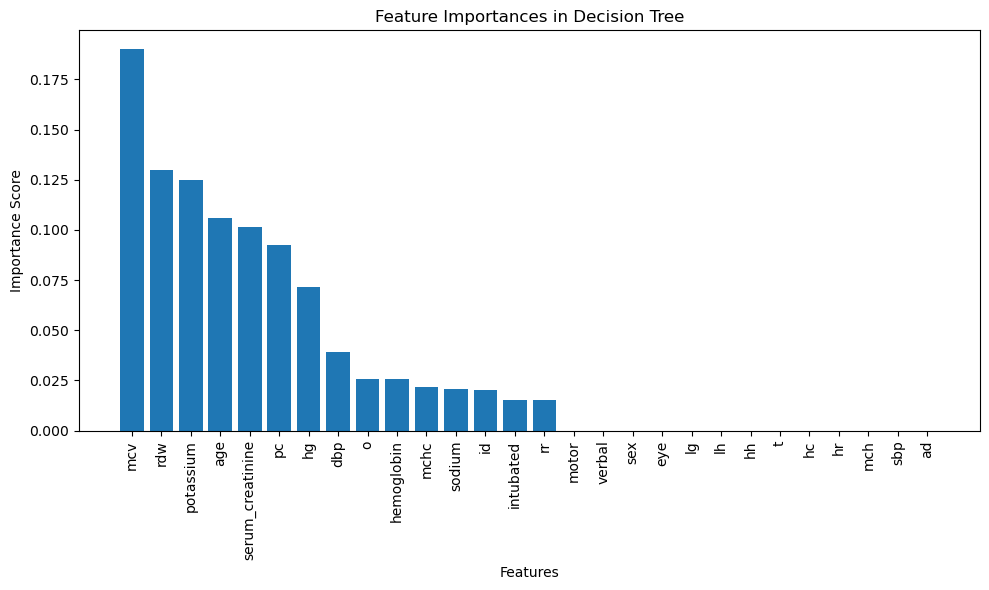

In [527]:
# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), sorted_feature_names, rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.title("Feature Importances in Decision Tree")
plt.tight_layout()
plt.show()

MCV-measures the average size of your red blood cells,RDW- The RDW test is commonly used to help diagnose anemia, a condition in which your red blood cells can't carry enough oxygen to the rest of your body.AGE-AGE

In [498]:
X.info()     

<class 'pandas.core.frame.DataFrame'>
Int64Index: 402 entries, 0 to 401
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                402 non-null    int64  
 1   sbp               402 non-null    int64  
 2   dbp               402 non-null    int64  
 3   hr                402 non-null    int64  
 4   rr                402 non-null    int64  
 5   o                 402 non-null    int64  
 6   t                 402 non-null    int64  
 7   hh                402 non-null    int64  
 8   lh                402 non-null    int64  
 9   hg                402 non-null    int64  
 10  lg                402 non-null    int64  
 11  age               402 non-null    int64  
 12  sex               402 non-null    int64  
 13  ad                402 non-null    int64  
 14  motor             402 non-null    float64
 15  verbal            402 non-null    float64
 16  eye               402 non-null    float64
 1

In [517]:
best_clf = best_estimators['decision_tree']

In [518]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[77,  3],
       [ 8, 13]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

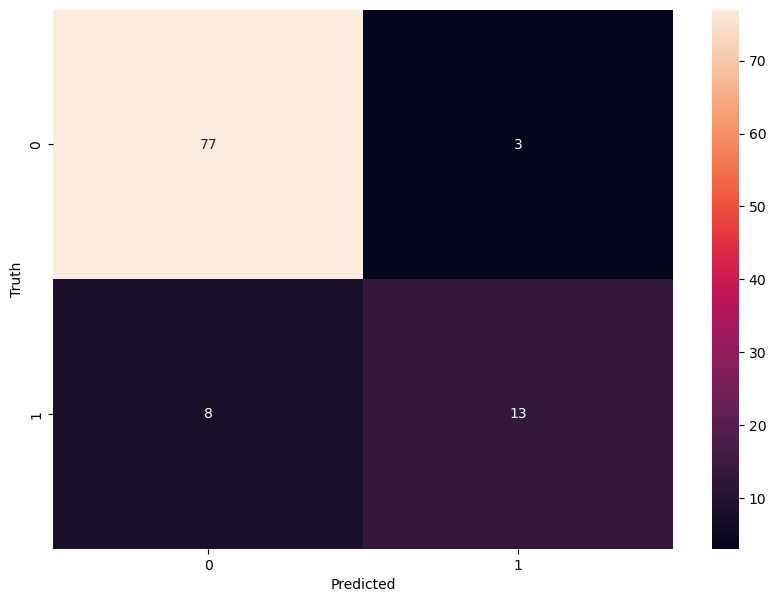

In [519]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [520]:
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'covpred_model.pkl') 

['covpred_model.pkl']

## correlation

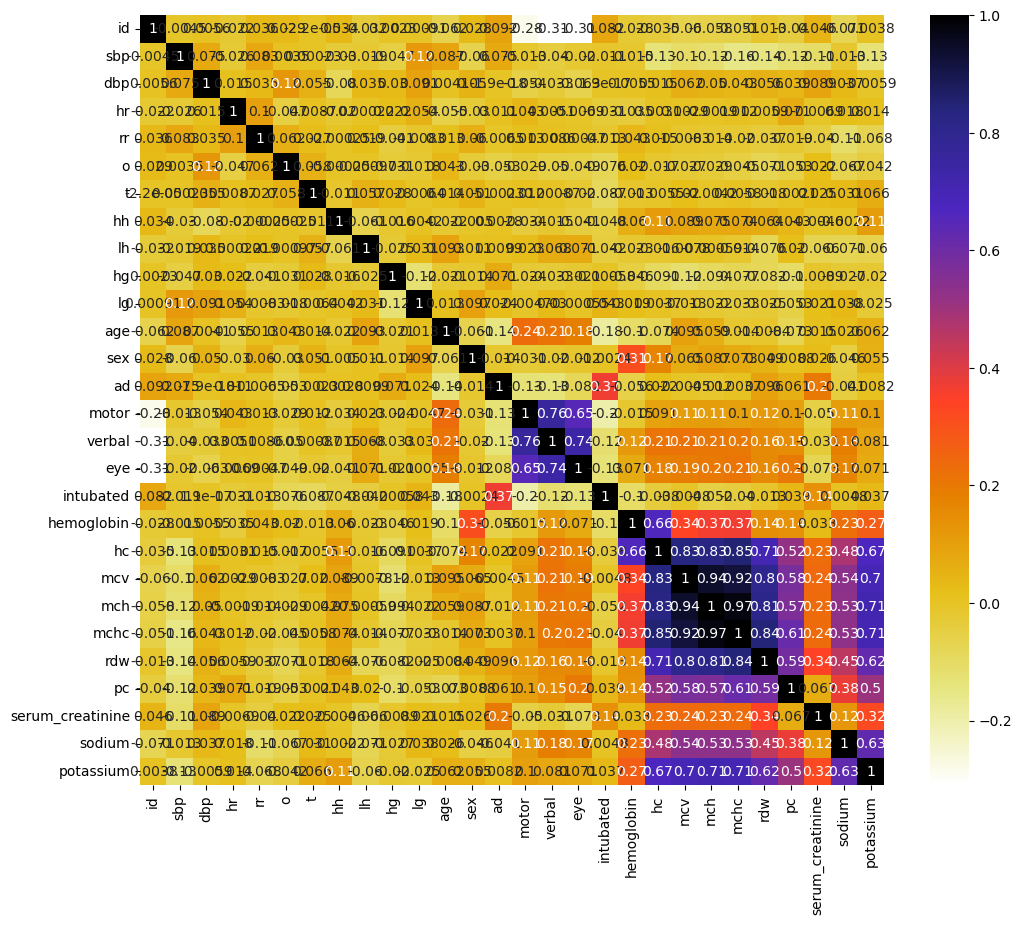

In [386]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [387]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [388]:
corrr_feature = correlation(X,0.85)
len(set(corrr_feature))

2

In [389]:
corrr_feature

{'mch', 'mchc'}

## PCA - useful comp

In [541]:
from sklearn.decomposition import PCA

pca = PCA(0.95)
X_pca = pca.fit_transform(X)
X_pca.shape

(402, 4)

In [543]:
X_pca

array([[ -63.59795618, -223.4813343 ,  -54.34968172,    6.38978853],
       [-139.25968223, -148.97609809,  140.94968418,  114.01277375],
       [ -34.31292422, -201.12647362,   20.23517628,  -53.14652214],
       ...,
       [-118.11498723,  171.91062515, -160.90738493,  128.43164326],
       [ -25.29628343,  155.57622476, -177.11122591,   -1.77199114],
       [ -57.88115095,  224.32319076,   20.82800097,   12.44371471]])

In [530]:
pca.explained_variance_ratio_

array([0.3977925 , 0.2672641 , 0.21223373, 0.07919605])

In [531]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=30)

In [532]:
mod_new = DecisionTreeClassifier()
mod_new.fit(X_train_pca,y_train_pca)
mod_new.score(X_test_pca,y_test_pca)

0.7654320987654321